<a href="https://colab.research.google.com/github/Tor-Storli/COLAB_DEMOS/blob/master/X_Ray_Pneumonia_Resnet50_WIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **About Google Colab**
#### Google Colab lets you create and work with Jupyter Notebooks using CPU, GPU or TPU compute processing for free. You need an Google account to use it. Once logged in you can start creating Python code. Colab comes pre-installed with many of the common python libraries, including PyTorch and Tensorflow.

## **What kind of GPU do we have access to here at Colab?**
#### Run the following code to see how much GPU memory is available.
#### We will use this to set the size of the mini batches later


In [0]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU

In [0]:
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print(gpu.name)
 print('==========')
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " \
                        + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB" \
               .format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Tesla T4
Gen RAM Free: 12.8 GB  | Proc size: 157.0 MB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB


### You can find more details about the code above here...
##### https://psutil.readthedocs.io/en/latest/
##### and here...
##### https://www.google.com/search?q=what+is+psutil&rlz=1C1CHBF_enUS765US765&oq=what+is+psutil&aqs=chrome..69i57j0l3.3582j0j8&sourceid=chrome&ie=UTF-8

## **System Environment info**

In [0]:
from psutil import *
print('cpu count: ',cpu_count())
print(' ')
print(cpu_stats())
print(' ')
!cat /proc/cpuinfo

In [0]:
!df -h

In [0]:
virtual_memory()

In [0]:
!cat /proc/meminfo

## OK, upwards and onwards...

### Google Colab comes with many Python Libraries already installed.
### Let us verify that fastai and pytorch are installed and are ready for use

In [0]:
!pip list | grep -e fastai -e torch -e torchvision -e matplotlib -e tensorflow -e keras

# If not, uncomment this line and install them
#!pip install torch torchvision fastai

fastai                   1.0.60     
keras-vis                0.4.1      
matplotlib               3.1.2      
matplotlib-venn          0.11.5     
mesh-tensorflow          0.1.8      
tensorflow               1.15.0     
tensorflow-datasets      1.3.2      
tensorflow-estimator     1.15.1     
tensorflow-gan           2.0.0      
tensorflow-hub           0.7.0      
tensorflow-metadata      0.15.2     
tensorflow-privacy       0.2.2      
tensorflow-probability   0.7.0      
torch                    1.3.1      
torchsummary             1.5.1      
torchtext                0.3.1      
torchvision              0.4.2      


### The grep (command in Unix/Linux) filter searches a file for a particular pattern of characters, and displays all lines that contain that pattern. 
### -e is strictly the flag for indicating the pattern you want to match against.

## Import "fastai" and the "os" library

In [0]:
import os
from fastai.vision import *
from fastai.metrics import accuracy, error_rate#

### Mount Google storage drive...

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### map training and test paths

In [0]:
data_root='/content/drive/My Drive/x_ray'

train_data_dir = os.path.join(data_root, 'train')
test_data_dir = os.path.join(data_root, 'test') 

#model_dir = '/content/drive/My Drive/models'

### Specify the name of your classes

In [0]:
classes = ['normal','pneumonia']

### Create an ImageDatabunch that sets the batch size, training and validation distribution, and performs transformations


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(train_data_dir, train=".", valid_pct=0.2, bs=64,
        ds_tfms=get_transforms(), size=224, num_workers=6)
       # ds_tfms=get_transforms(do_flip=False, max_rotate = 0.0,max_warp = 0.0), size=224, num_workers=6) Not a good idea to change these transformations

data.normalize(imagenet_stats)

In [0]:
doc(ImageDataBunch)

In [0]:
?get_transforms()

In [0]:
doc(get_transforms)

### More num_workers would consume more memory usage but is helpful to speed up the I/O process.
#### You can follow the discussion here:
##### https://discuss.pytorch.org/t/relation-between-num-workers-batch-size-and-epoch-in-dataloader/18201

##### https://stackoverflow.com/questions/53998282/how-does-the-number-of-workers-parameter-in-pytorch-dataloader-actually-work

In [0]:
data.classes

['normal', 'pneumonia']

In [0]:
data.c

2

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
doc(data.show_batch)

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['normal', 'pneumonia'], 2, 320, 80)

### Import Resnet-50 architecture

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=[error_rate,accuracy])

In [0]:
learn.summary()

### Force PyTorch to use the GPU

In [0]:
defaults.device = torch.device('cuda') # use gpu

###Training using the 1cycle approach

In [0]:
doc(fit_one_cycle)

### 

In [0]:
doc()

In [0]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.748375,1.671449,0.375000,0.625000,01:16
1,0.478317,0.460242,0.137500,0.862500,00:21
2,0.376923,0.485122,0.100000,0.900000,00:22
3,0.325320,0.451846,0.100000,0.900000,00:22
4,0.268416,0.383372,0.087500,0.912500,00:22


In [0]:
learn.save('x_ray_pneumonia_wip_res50_01_NEW')

In [0]:
learn.load('x_ray_pneumonia_wip_res50_01_NEW');

In [0]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         4,096      False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     False     
___________________________________________________

In [0]:
learn.unfreeze()

In [0]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         4,096      True      
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     True      
___________________________________________________

### You can read about the One_Cycle approach and learning rate here...

### https://docs.fast.ai/callbacks.one_cycle.html

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


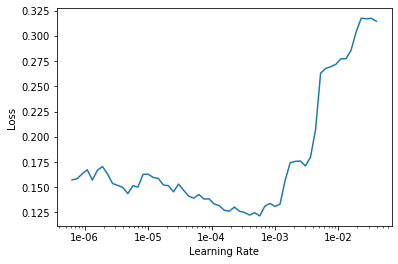

In [0]:
learn.recorder.plot()

### Find and plot the best individual learning rate

Min numerical gradient: 2.29E-06
Min loss divided by 10: 5.75E-05


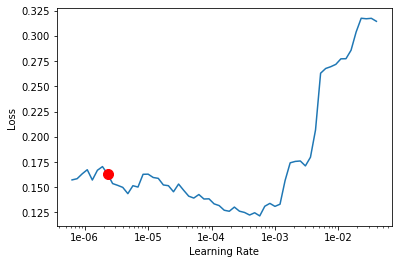

In [0]:
learn.recorder.plot(suggestion=True)

### Print out the actual best learning rate value

In [0]:
min_grad_lr = learn.recorder.min_grad_lr
print('scientific:', min_grad_lr)
print('decimal: {0:.10f}'.format(min_grad_lr))

scientific: 2.2908676527677735e-06
decimal: 0.0000022909


#### This explains the allocation of the slice method

#### https://docs.fast.ai/basic_train.html#Discriminative-layer-training

In [0]:
learn.fit_one_cycle(6, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.126753,0.289139,0.050000,0.950000,00:24
1,0.080190,0.355939,0.087500,0.912500,00:23
2,0.066911,0.111510,0.012500,0.987500,00:23
3,0.056286,0.184958,0.062500,0.937500,00:23
4,0.063387,0.211349,0.037500,0.962500,00:23
5,0.070325,0.208357,0.025000,0.975000,00:23


In [0]:
learn.data.batch_size

64

In [0]:
preds = learn.pred_batch()
len(preds)

64

### Let us look at the first 10 predictions made on the Validation set during training

In [0]:
data.classes

['normal', 'pneumonia']

In [0]:
preds[:10]

tensor([[1.0000e+00, 8.9420e-13],
        [1.0000e+00, 3.7398e-14],
        [5.5683e-07, 1.0000e+00],
        [1.0000e+00, 2.3066e-15],
        [8.7990e-12, 1.0000e+00],
        [2.0512e-14, 1.0000e+00],
        [1.0000e+00, 5.2200e-13],
        [1.6587e-12, 1.0000e+00],
        [1.0000e+00, 9.2895e-09],
        [7.5466e-09, 1.0000e+00]])

In [0]:
pip install colored

In [0]:
import colored
print(colored.bg("white") + colored.fg("green") + "Hello world!")

Hello world!


In [0]:
def format_pred(element_in):
  outval = 'normal: {0:.10f}'.format(element_in)
  return outval  
  print(outval)

In [0]:
n = 1
for element in preds[:10]:
  if element[0] > element[1]:
    vnorm = format_pred(element[0])  
    vnormprt = colored.bg("white") + colored.fg("green") + vnorm
    vpneumprt = format_pred(element[1]) 
  else:
    vnormprt = format_pred(element[0]) 
    vpneum = format_pred(element[1])  
    vpneumprt = colored.bg("white") + colored.fg("green") + vpneum

  print('Image',str(n), vnormprt, vpneumprt)
  n += 1

Image 1 normal: 1.0000000000 normal: 0.0000000001
Image 2 normal: 1.0000000000 normal: 0.0000000000
Image 3 normal: 0.0001576625 normal: 0.9998422861
Image 4 normal: 0.9999998808 normal: 0.0000001780
Image 5 normal: 0.0000000004 normal: 1.0000000000
Image 6 normal: 0.0000000000 normal: 1.0000000000
Image 7 normal: 0.9999998808 normal: 0.0000001058
Image 8 normal: 0.0000000000 normal: 1.0000000000
Image 9 normal: 1.0000000000 normal: 0.0000000000
Image 10 normal: 0.0000002710 normal: 0.9999997616


In [0]:
n = 1
for element in preds[:10]:
  if element[0] > element[1]:
    vnorm = colored.bg("white") + colored.fg("green") + str(element[0])  
    #print(vnorm.)
  else:
    vpneum = colored.bg("white") + colored.fg("green") + str(element[1])    
  print('Image',str(n),'normal: {0:.10f}'.format(colored.bg("white") + colored.fg("green") + element[0])) #, 'pneumonia: {0:.10f}'.format(vpneum))
  n += 1

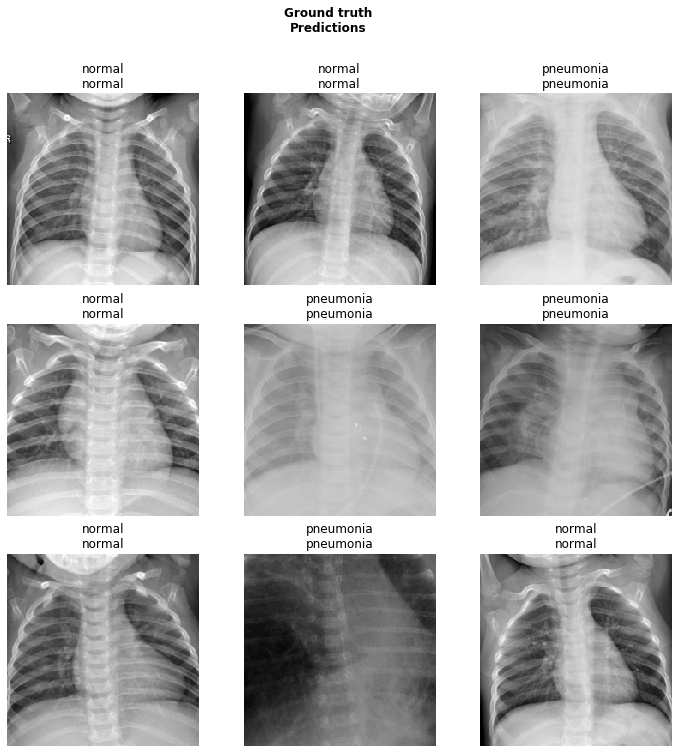

In [0]:
learn.show_results(rows=3)

In [0]:
doc(learn.show_results)

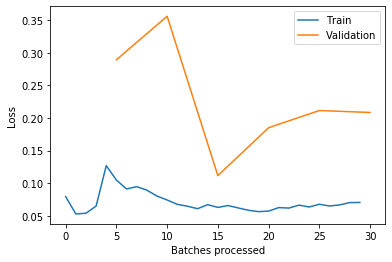

In [0]:
learn.recorder.plot_losses()

In [0]:
doc(learn.recorder.plot_losses)

In [0]:
learn.recorder.plot_metrics()

In [0]:
doc(learn.recorder.plot_losses)

In [0]:
doc(learn.fit_one_cycle)


In [0]:
learn.save('x_ray_pneumonia_res50_wip_final')

In [0]:
learn.load('x_ray_pneumonia_res50_wip_final')

In [0]:
learn.summary()

In [0]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

In [0]:
learn.save('x_ray_pneumonia_wip_Res50_final')

In [0]:
learn.load('x_ray_pneumonia_wip_Res50_final')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

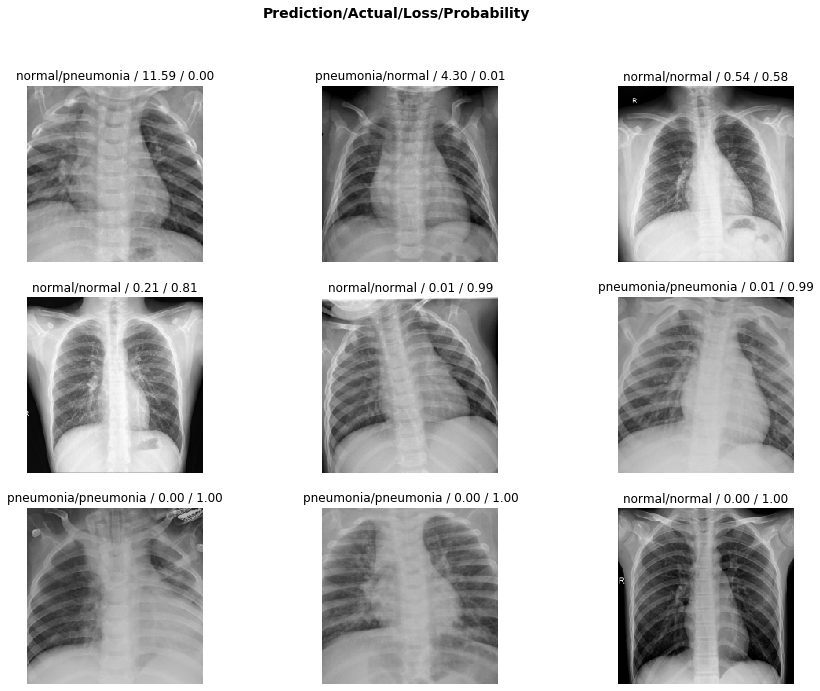

In [0]:
interp.plot_top_losses(9,figsize=(15,11))

In [0]:
interp.most_confused(min_val=1)

[('normal', 'pneumonia', 1), ('pneumonia', 'normal', 1)]

In [0]:
doc(interp.plot_top_losses)

In [0]:
%%html
<img src='https://drive.google.com/uc?id=1WO557kCDKaUhou3TPkDgzoWTiS2NsyS_' width="300 px" height="200 px" />

### Let us look at the Confusion Matrix

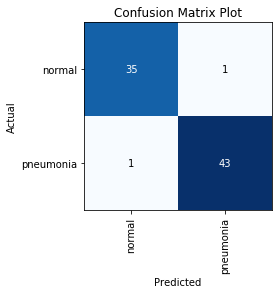

In [0]:
interp.plot_confusion_matrix(title='Confusion Matrix Plot')

## Serialize and Export model using pickle
#### Python pickle module is used for serializing and de-serializing a Python objects

In [0]:
learn.export('final_export_Resnet50.pkl')

## Create a Simple Web Server and test out your model
### https://course.fast.ai/deployment_render.html#deploy
### https://course.fast.ai/deployment_render.html#fork-the-starter-app-on-github


### ==============  END OF MODULE  ==================